In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv('btc_historical_data.csv')
data_test = pd.read_csv('new_dataset.csv')

# Display the first few rows of the dataset for inspection
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                  time      open      high      low    close      volumeto
0  2018-02-01 00:00:00  10226.86  10280.84  8726.95  9114.72  1.964309e+09
1  2018-02-02 00:00:00   9114.73   9147.93  7786.20  8870.82  2.768760e+09
2  2018-02-03 00:00:00   8872.87   9504.37  8194.68  9251.27  1.253485e+09
3  2018-02-04 00:00:00   9251.27   9400.99  7889.83  8218.05  1.413207e+09
4  2018-02-05 00:00:00   8218.05   8391.29  6627.31  6937.08  2.534149e+09


In [37]:
X_features = ['open', "volumeto"]
target_column = 'close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_test = data_test[X_features]
y_test = data_test[target_column]

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1462, 2)
Shape of X_test: (334, 2)
Shape of y_train: (1462,)
Shape of y_test: (334,)


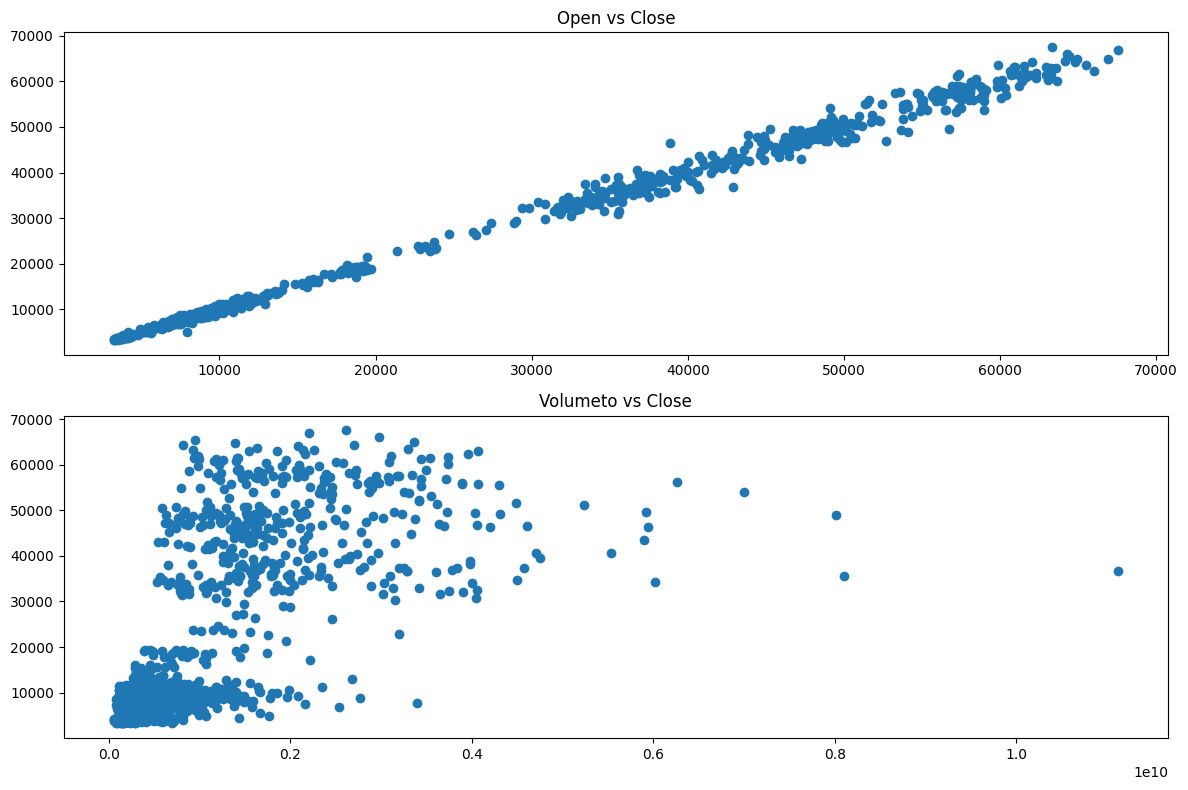

In [38]:
fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].scatter(X_train['open'], y_train)
axs[0].set_title('Open vs Close')

axs[1].scatter(X_train['volumeto'], y_train)
axs[1].set_title('Volumeto vs Close')

plt.tight_layout()
plt.show()

In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [40]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b}")

w = [ 1.00569392e+00 -1.70795392e-07], b = 72.45624125504764


Training MSE: 1009345.6852737846


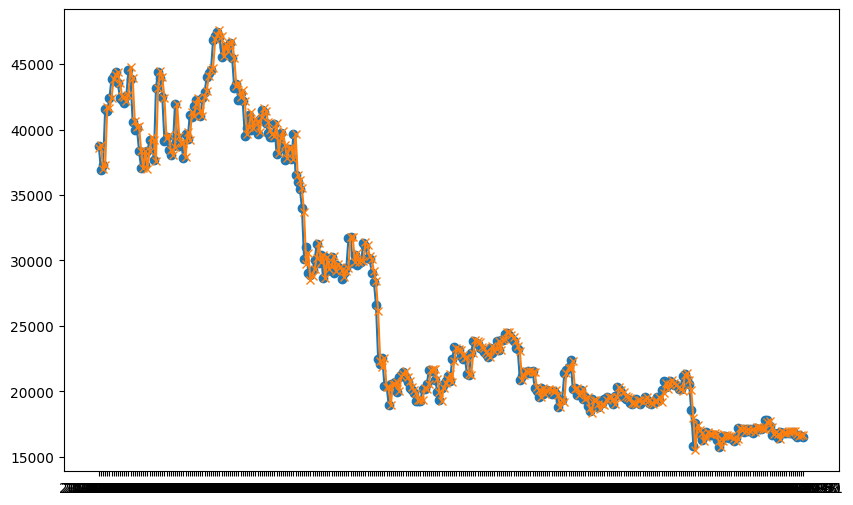

In [49]:
from sklearn.metrics import mean_squared_error

predictions = linear_model.predict(X_test).tolist()

time_column =data_test['time']

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE: {train_mse}")
plt.show()


